In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, 

## Load data

In [2]:
data = pd.read_csv('group_dataset.csv')

## Data view

In [3]:
data.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL_STATUS,OCCUPATION,RELATIONSHIP,RACE,SEX,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,CLASS_PROBABILITY_SCORE
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
ProfileReport(data)

Number of variables,15
Number of observations,32561
Total Missing (%),0.0%
Total size in memory,3.7 MiB
Average record size in memory,120.0 B
Numeric,6
Categorical,9
Boolean,0
Date,0
Text (Unique),0
Rejected,0


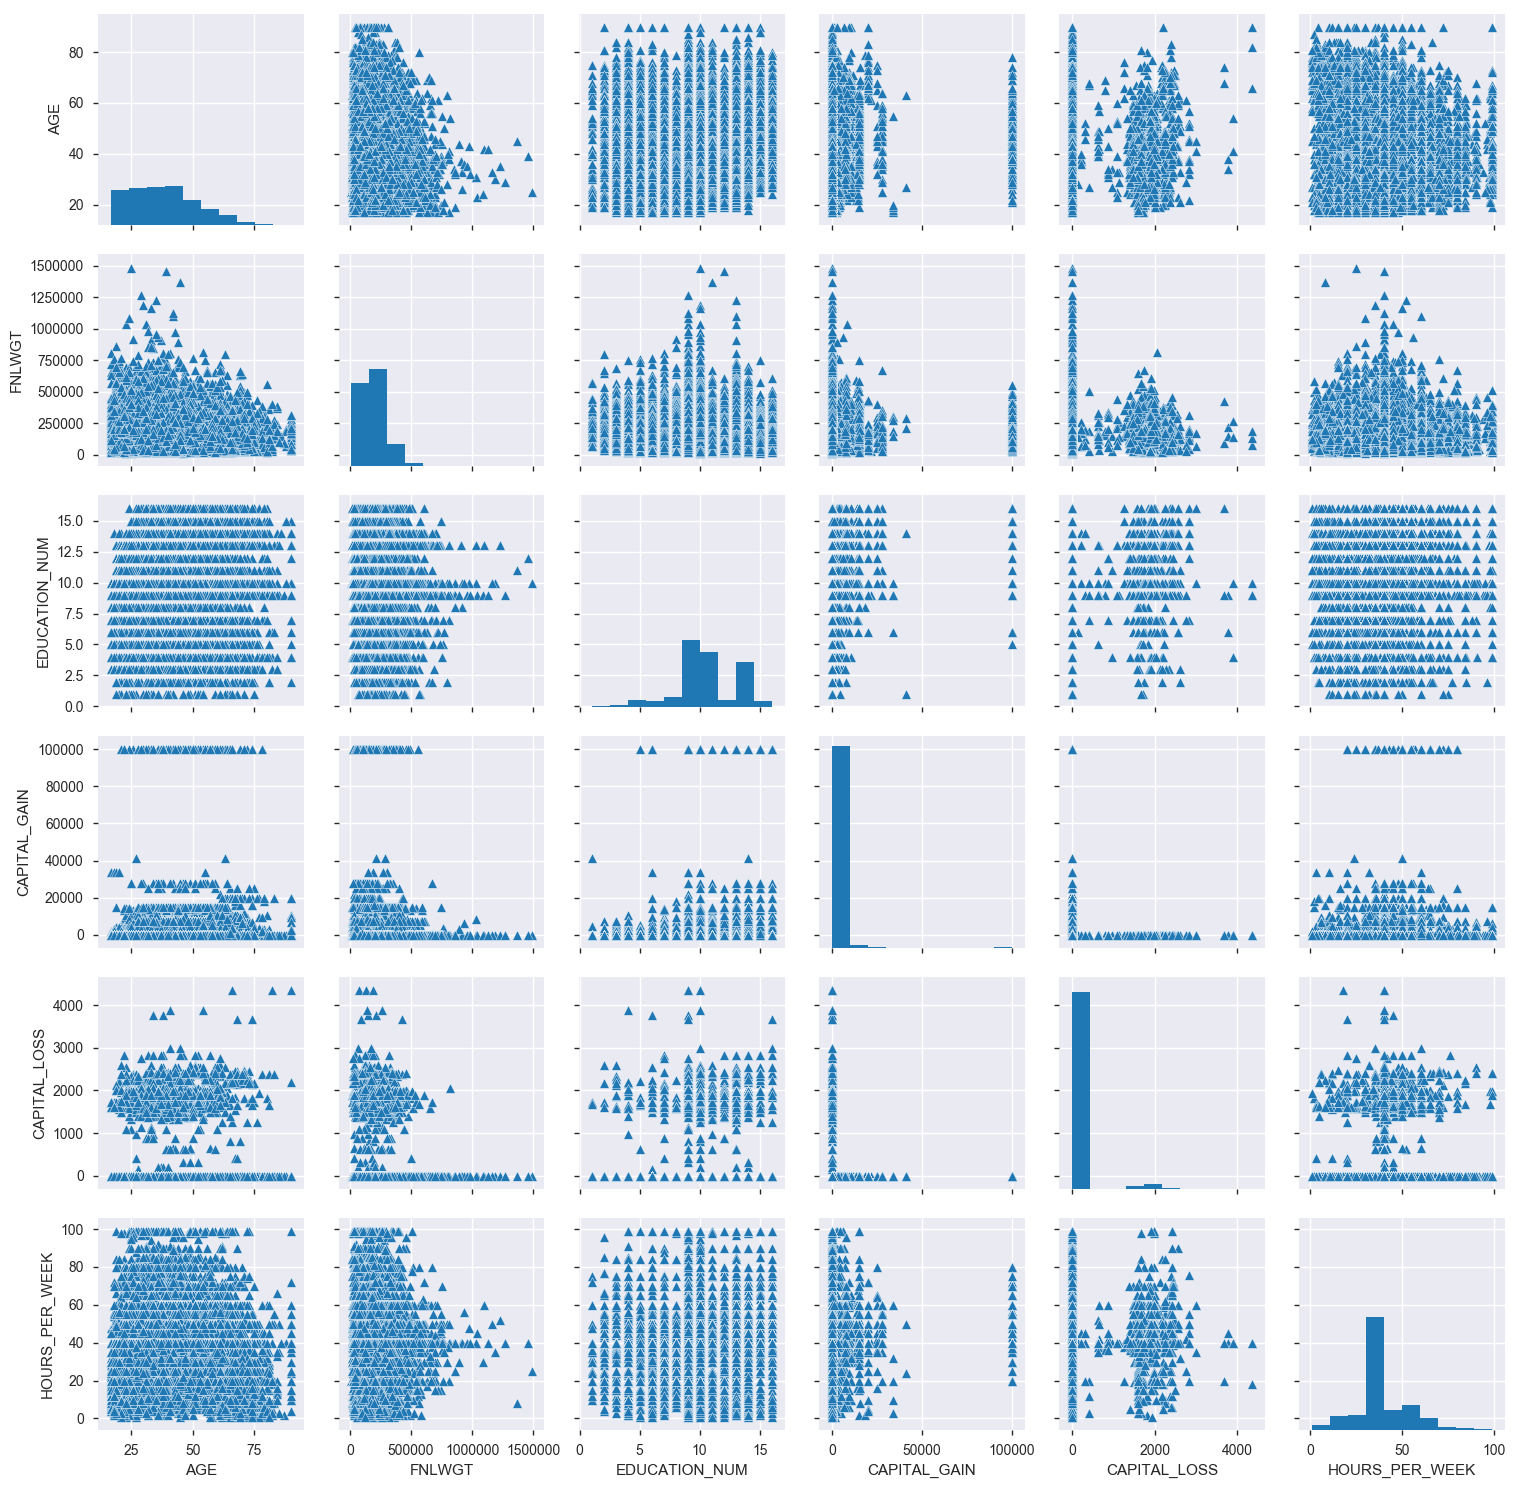

In [5]:
sns.pairplot(data, markers='^')

### One-hot encoding for 'CLASS_PROBABILITY_SCORE'

In [6]:
type(data['CLASS_PROBABILITY_SCORE']), type(data['CLASS_PROBABILITY_SCORE'][0])

(pandas.core.series.Series, str)

In [7]:
data['CLASS_PROBABILITY_SCORE'] = data['CLASS_PROBABILITY_SCORE'].apply(lambda x: 0 if x == '<=50' else 1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


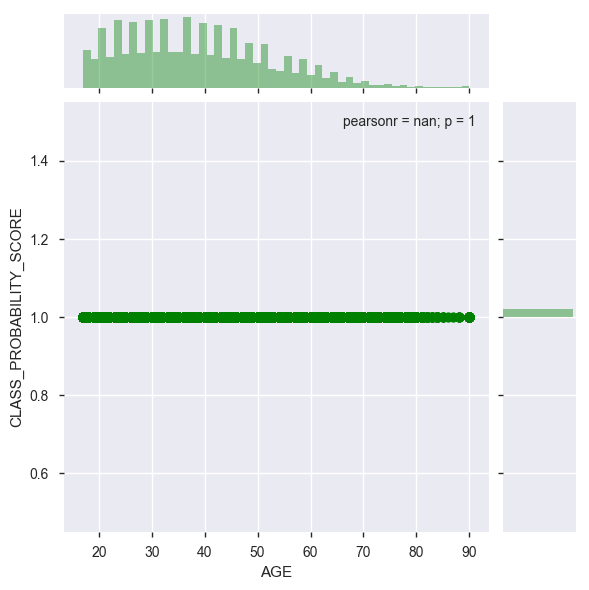

In [8]:
sns.jointplot(x = 'AGE', y = 'CLASS_PROBABILITY_SCORE', data = data, color = 'green')

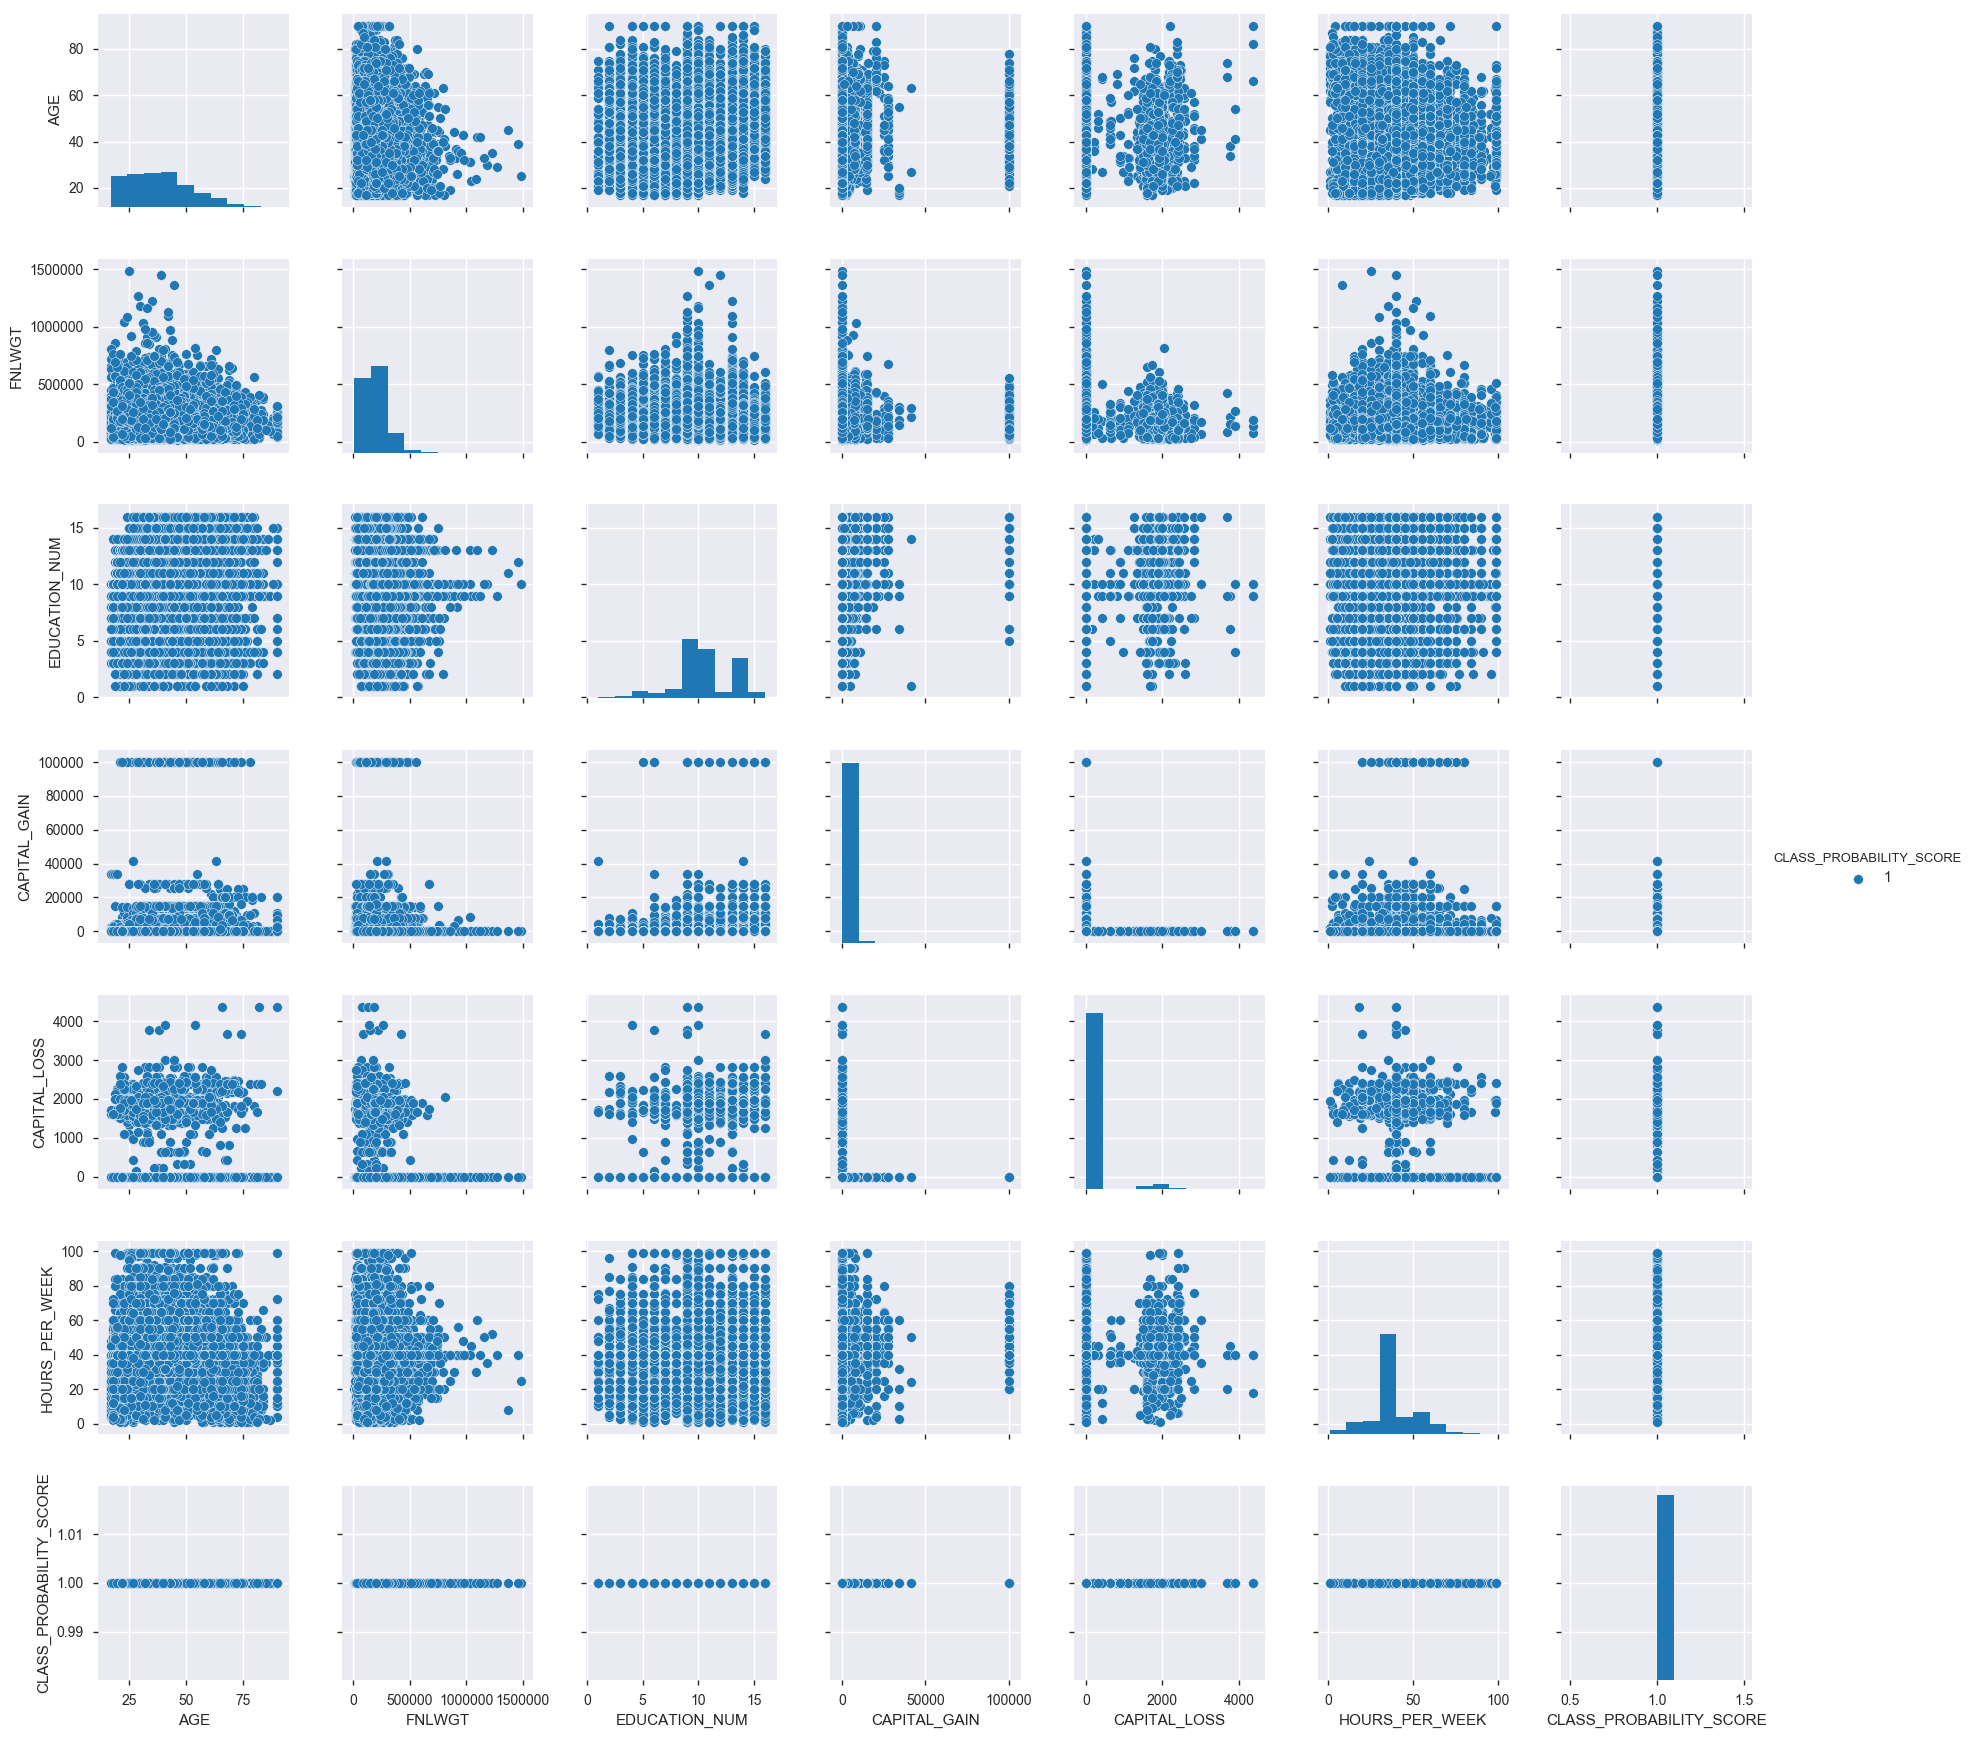

In [9]:
sns.pairplot(data,hue='CLASS_PROBABILITY_SCORE')

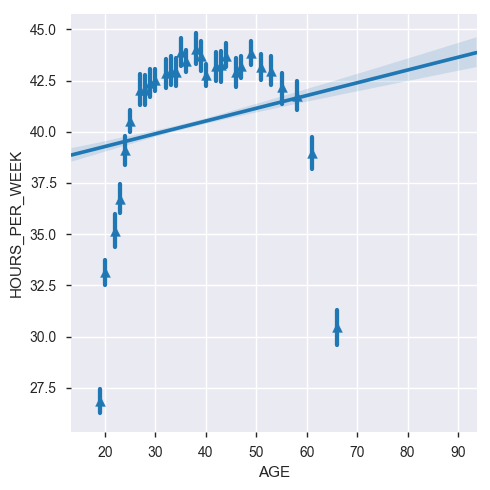

In [10]:
sns.lmplot(x='AGE',y='HOURS_PER_WEEK',data=data, markers='^', x_bins=30)

Text(0.5,0,'AGE')

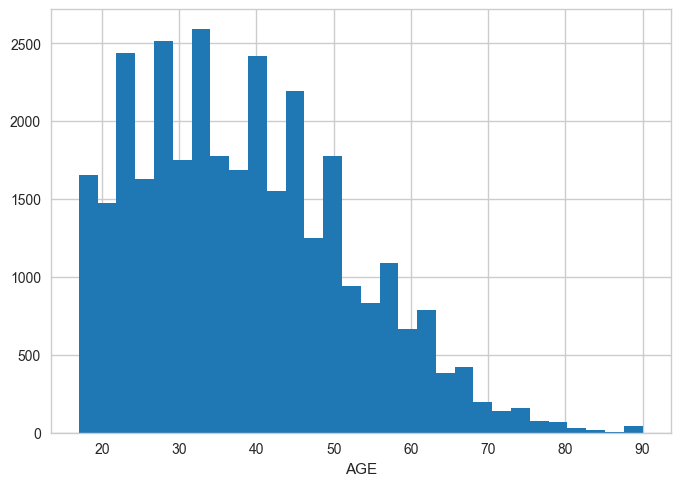

In [11]:
sns.set_style('whitegrid')
data['AGE'].hist(bins=30)
plt.xlabel('AGE')

## EDA, plus additional Visualization

In [12]:
# data is absolute clear
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
AGE                        32561 non-null int64
WORKCLASS                  32561 non-null object
FNLWGT                     32561 non-null int64
EDUCATION                  32561 non-null object
EDUCATION_NUM              32561 non-null int64
MARITAL_STATUS             32561 non-null object
OCCUPATION                 32561 non-null object
RELATIONSHIP               32561 non-null object
RACE                       32561 non-null object
SEX                        32561 non-null object
CAPITAL_GAIN               32561 non-null int64
CAPITAL_LOSS               32561 non-null int64
HOURS_PER_WEEK             32561 non-null int64
NATIVE_COUNTRY             32561 non-null object
CLASS_PROBABILITY_SCORE    32561 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [14]:
data.describe()

,AGE,FNLWGT,EDUCATION_NUM,CAPITAL_GAIN,CAPITAL_LOSS,HOURS_PER_WEEK,CLASS_PROBABILITY_SCORE
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.0
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,1.0
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.0
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,1.0
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.0
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.0
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.0
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.0


In [15]:
data.dtypes

AGE                         int64
WORKCLASS                  object
FNLWGT                      int64
EDUCATION                  object
EDUCATION_NUM               int64
MARITAL_STATUS             object
OCCUPATION                 object
RELATIONSHIP               object
RACE                       object
SEX                        object
CAPITAL_GAIN                int64
CAPITAL_LOSS                int64
HOURS_PER_WEEK              int64
NATIVE_COUNTRY             object
CLASS_PROBABILITY_SCORE     int64
dtype: object

In [19]:
print(data.AGE.unique(), "len =", len(data.AGE.unique()))

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] len = 73


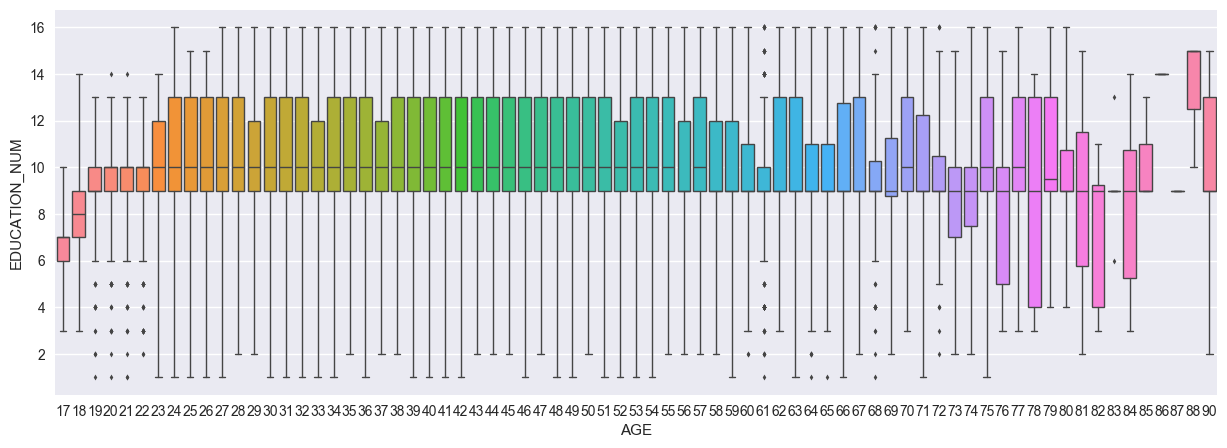

In [39]:
sns.boxplot(x = 'AGE', y = 'EDUCATION_NUM', data = data, fliersize = 3, linewidth=1, whis = 3, saturation=5)
sns.set(rc={'figure.figsize':(20,8)})

In [41]:
data.WORKCLASS.unique() # nothing matter give me..

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [42]:
data.FNLWGT.unique() # what is it?

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

In [43]:
data.NATIVE_COUNTRY.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

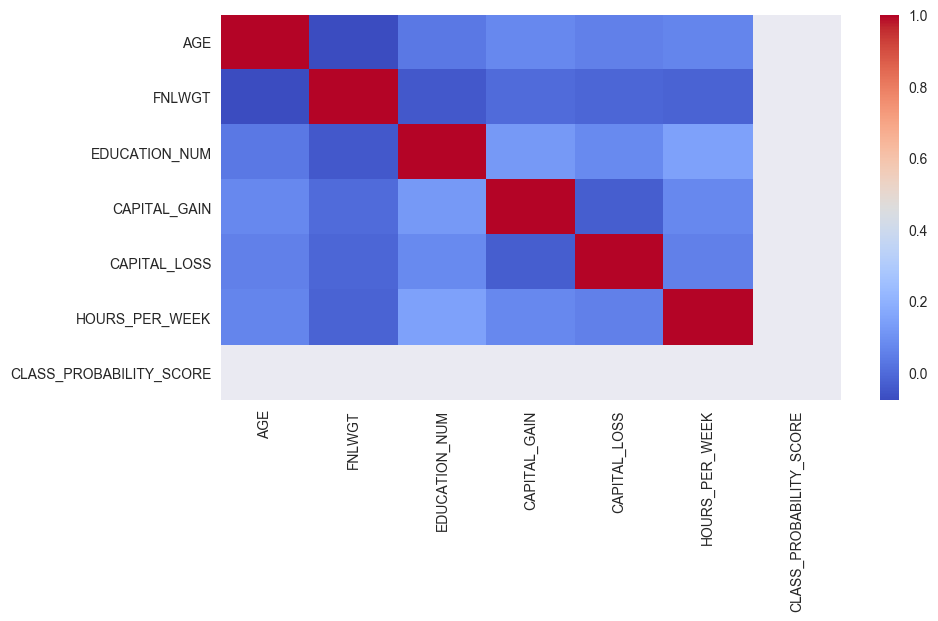

In [58]:
# look at high correlation components
sns.heatmap(data.corr(), cmap = 'coolwarm')
# sns.set(rc={'figure.figsize':(10,5)})

### Build graphs with high correlation features

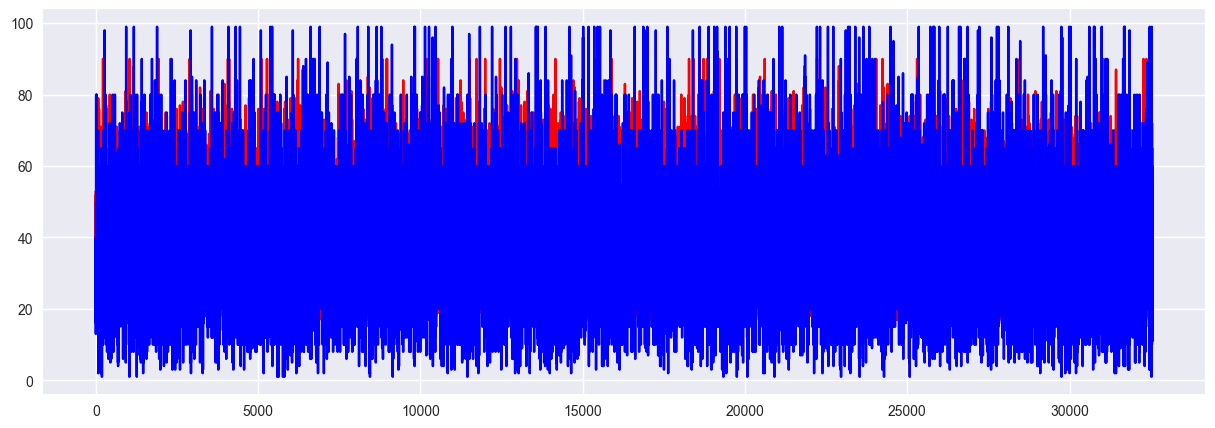

In [62]:
plt.figure(figsize=(15, 5))
plt.plot(data.AGE, color = 'red')

plt.plot(data.HOURS_PER_WEEK, color = 'blue')

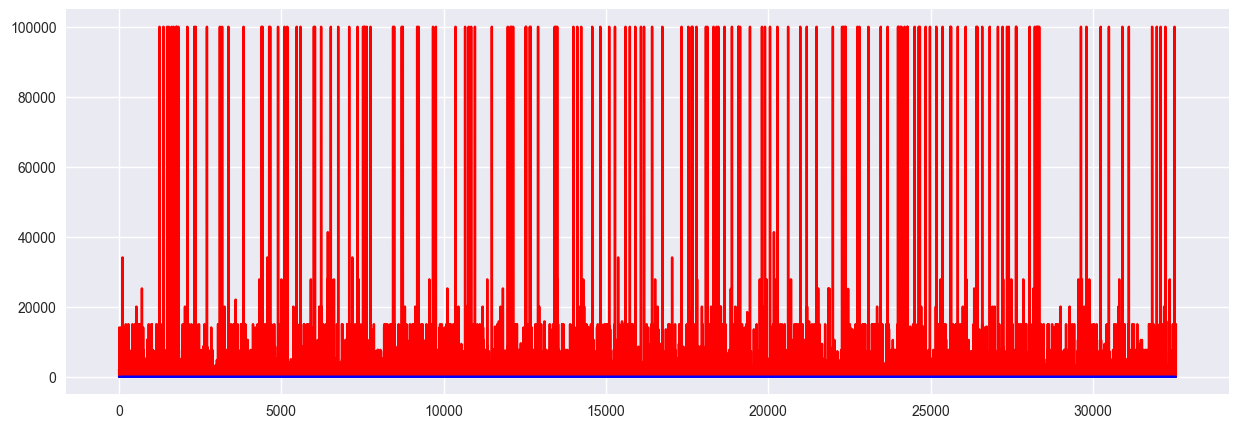

In [65]:
plt.figure(figsize=(15, 5))
plt.plot(data.CAPITAL_GAIN, color = 'red')

plt.plot(data.EDUCATION_NUM, color = 'blue')

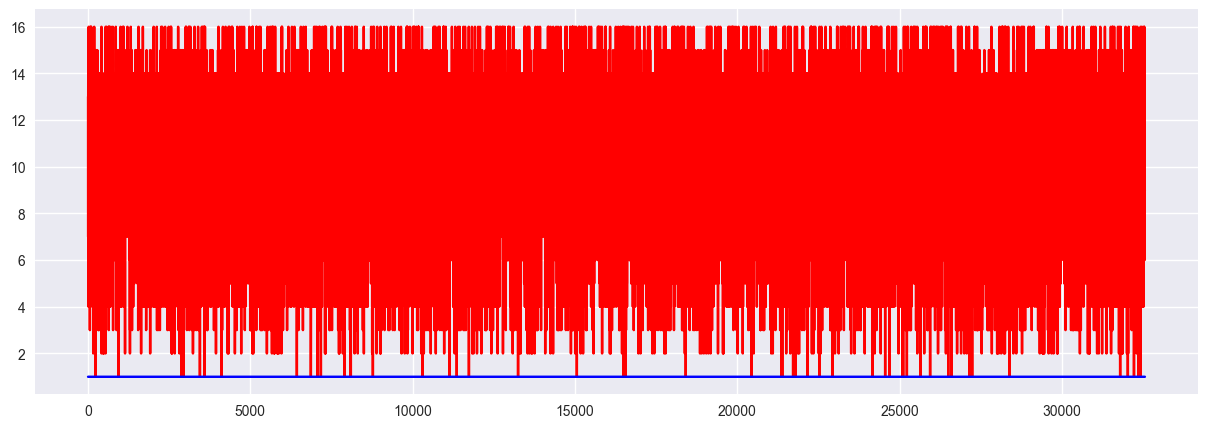

In [66]:
plt.figure(figsize=(15, 5))
plt.plot(data.EDUCATION_NUM, color = 'red')

plt.plot(data.CLASS_PROBABILITY_SCORE, color = 'blue')

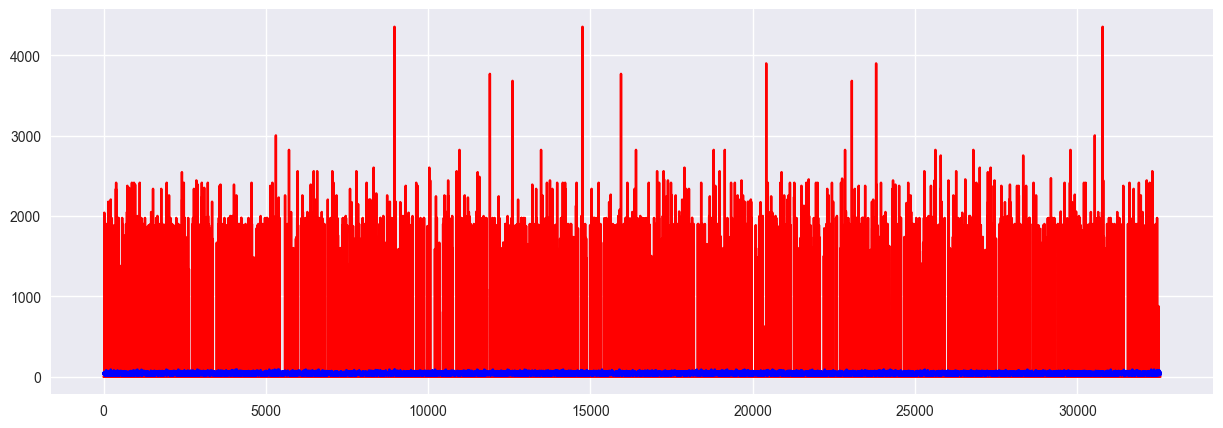

In [69]:
plt.figure(figsize=(15, 5))
plt.plot(data.CAPITAL_LOSS, color = 'red')

plt.plot(data.AGE, color = 'blue')

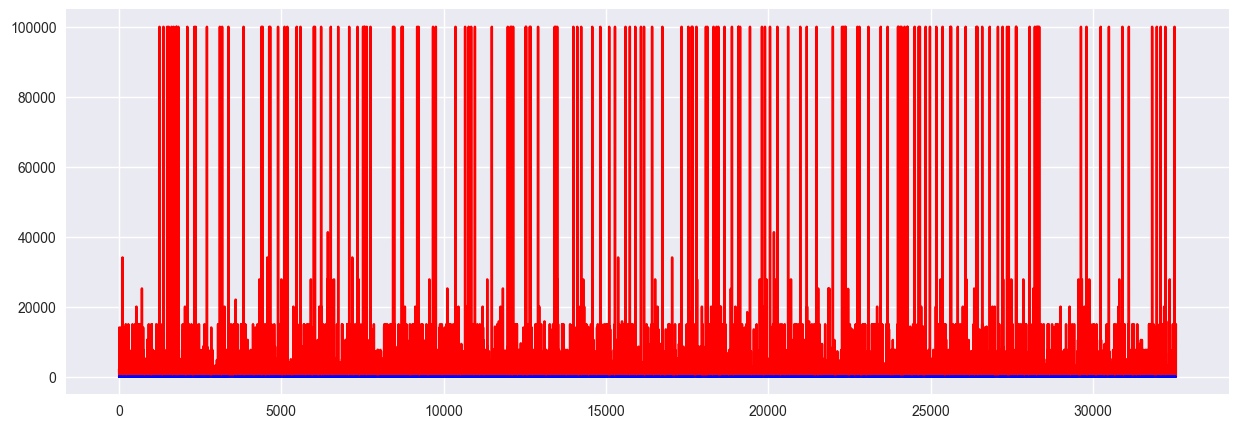

In [70]:
plt.figure(figsize=(15, 5))
plt.plot(data.CAPITAL_GAIN, color = 'red')

plt.plot(data.HOURS_PER_WEEK, color = 'blue')